In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-data/CarPrice_Assignment.csv
/kaggle/input/car-data/Data Dictionary - carprices.xlsx


In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Reading DataFrame

In [5]:
path='/kaggle/input/car-data/CarPrice_Assignment.csv'
df=pd.read_csv(path)

In [6]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Data Preprocessing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [35]:
df['highwaympg']

0      27
1      27
2      26
3      30
4      22
       ..
200    28
201    25
202    23
203    27
204    25
Name: highwaympg, Length: 205, dtype: int64

In [9]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [11]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [83]:
numerical_columns = ['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','horsepower','highwaympg','price']

def remove_outliers(df, cols):
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    return df[~((df[cols] < lower_bound) | (df[cols] > upper_bound)).any(axis=1)]

df = remove_outliers(df, numerical_columns)
df_copy = df

# Data Visualisation

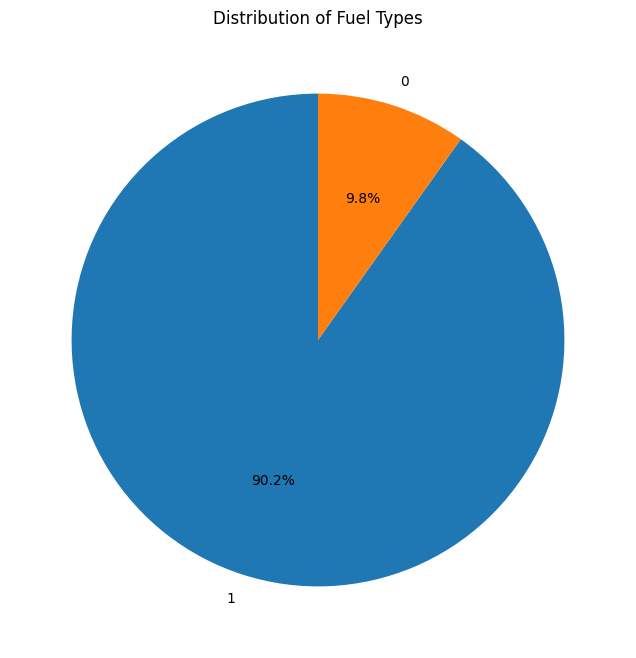

In [84]:
fuel_counts = df['fueltype'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(fuel_counts, labels=fuel_counts.index, autopct='%1.1f%%', startangle=90)

# Add a title
plt.title('Distribution of Fuel Types')

plt.show()

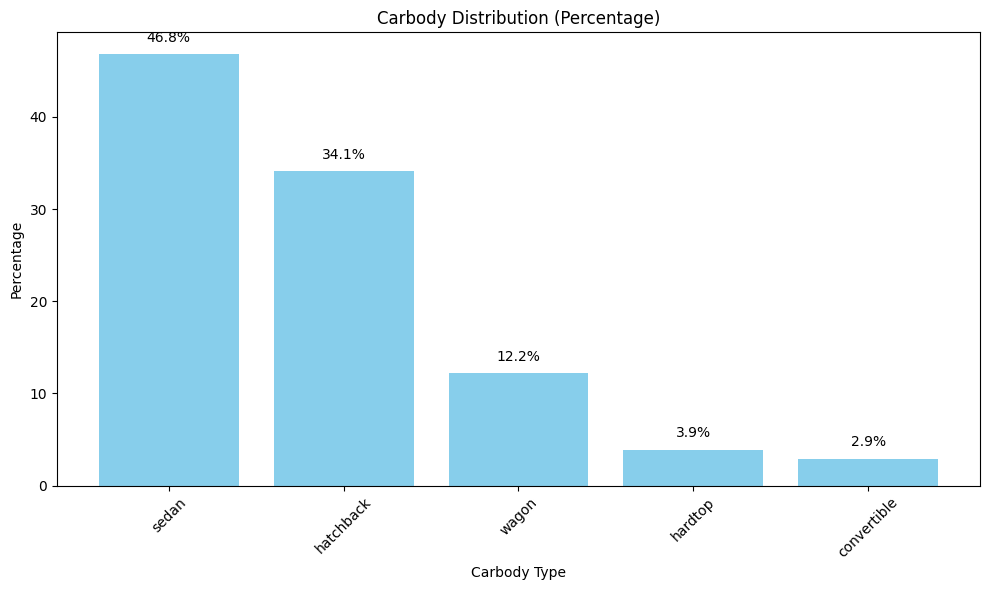

In [85]:
carbody_percentage = (carbodies / carbodies.sum()) * 100

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the bar chart for carbody percentages
ax.bar(carbodies.index, carbody_percentage.values, color='skyblue')

# Title and labels
ax.set_title('Carbody Distribution (Percentage)')
ax.set_xlabel('Carbody Type')
ax.set_ylabel('Percentage')

# Display the percentage on top of the bars
for i, v in enumerate(carbody_percentage):
    ax.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

# Rotate x-axis labels for readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


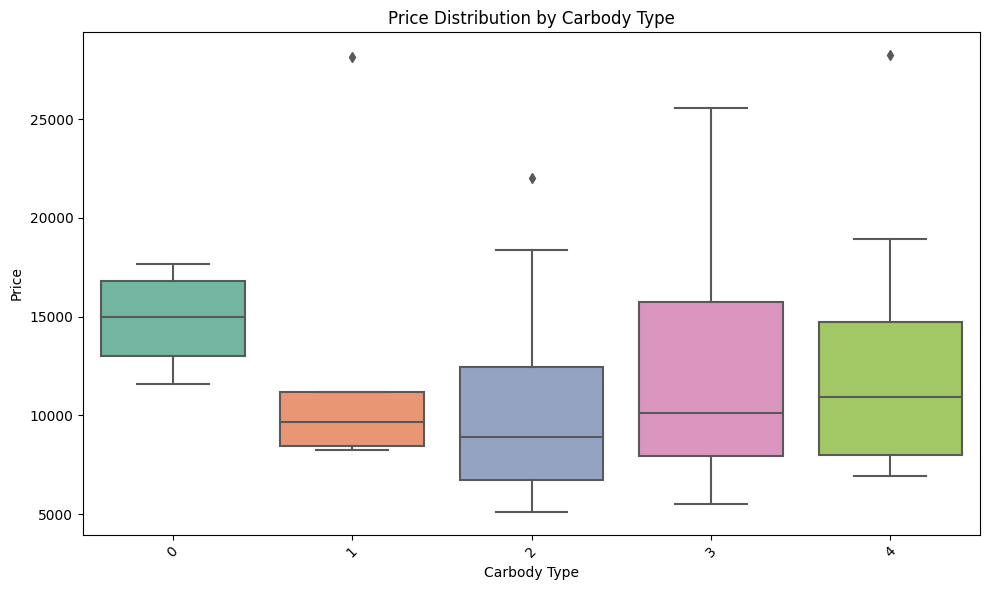

In [86]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='carbody', y='price', data=df, palette='Set2')

# Title and labels
plt.title('Price Distribution by Carbody Type')
plt.xlabel('Carbody Type')
plt.ylabel('Price')

# Rotate x-axis labels for readability (if needed)
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

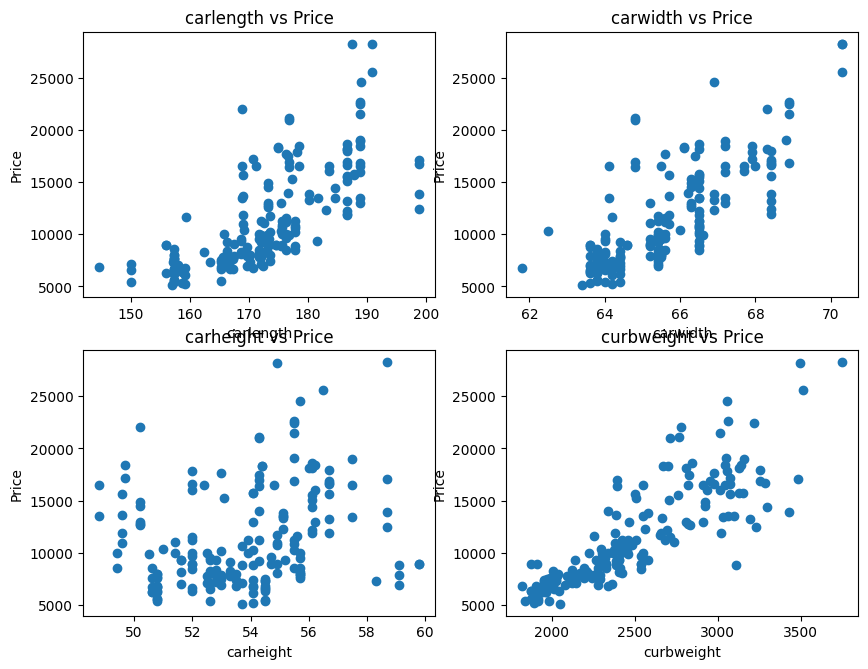

In [144]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(df[x],df['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)


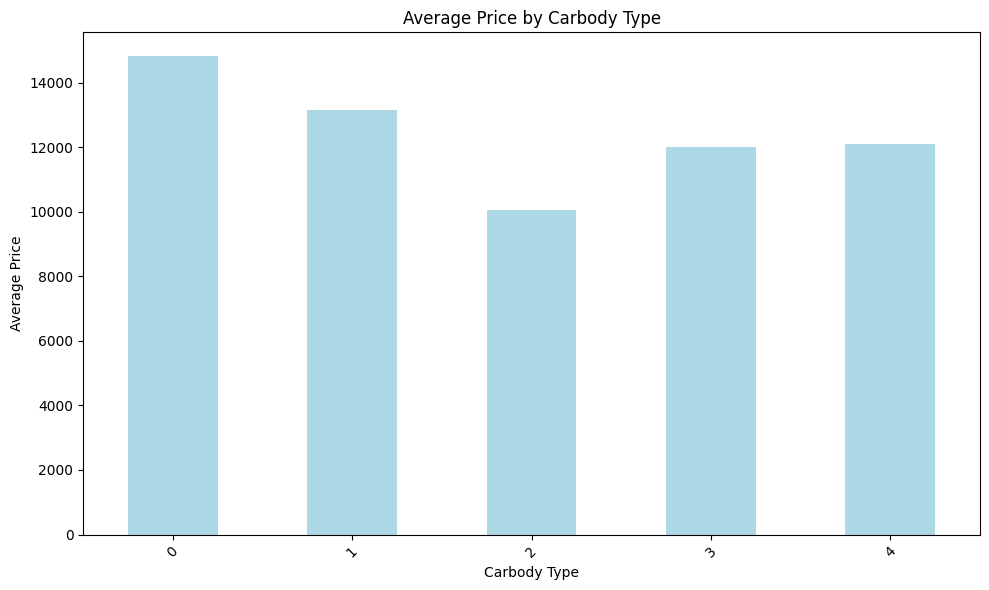

In [88]:
carbody_avg_price = df.groupby('carbody')['price'].mean()

# Create a bar plot for average price per carbody
plt.figure(figsize=(10, 6))
carbody_avg_price.plot(kind='bar', color='lightblue')

# Title and labels
plt.title('Average Price by Carbody Type')
plt.xlabel('Carbody Type')
plt.ylabel('Average Price')

plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()

In [89]:
lb=LabelEncoder()
df['CarName']=lb.fit_transform(df['CarName'])
df['fueltype']=lb.fit_transform(df['fueltype'])
df['aspiration']=lb.fit_transform(df['aspiration'])
df['doornumber']=lb.fit_transform(df['doornumber'])
df['carbody']=lb.fit_transform(df['carbody'])
df['drivewheel']=lb.fit_transform(df['drivewheel'])
df['enginelocation']=lb.fit_transform(df['enginelocation'])
df['enginetype']=lb.fit_transform(df['enginetype'])
df['cylindernumber']=lb.fit_transform(df['cylindernumber'])
df['fuelsystem']=lb.fit_transform(df['fuelsystem'])

/tmp/ipykernel_30/3635910883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CarName']=lb.fit_transform(df['CarName'])
/tmp/ipykernel_30/3635910883.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fueltype']=lb.fit_transform(df['fueltype'])
/tmp/ipykernel_30/3635910883.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

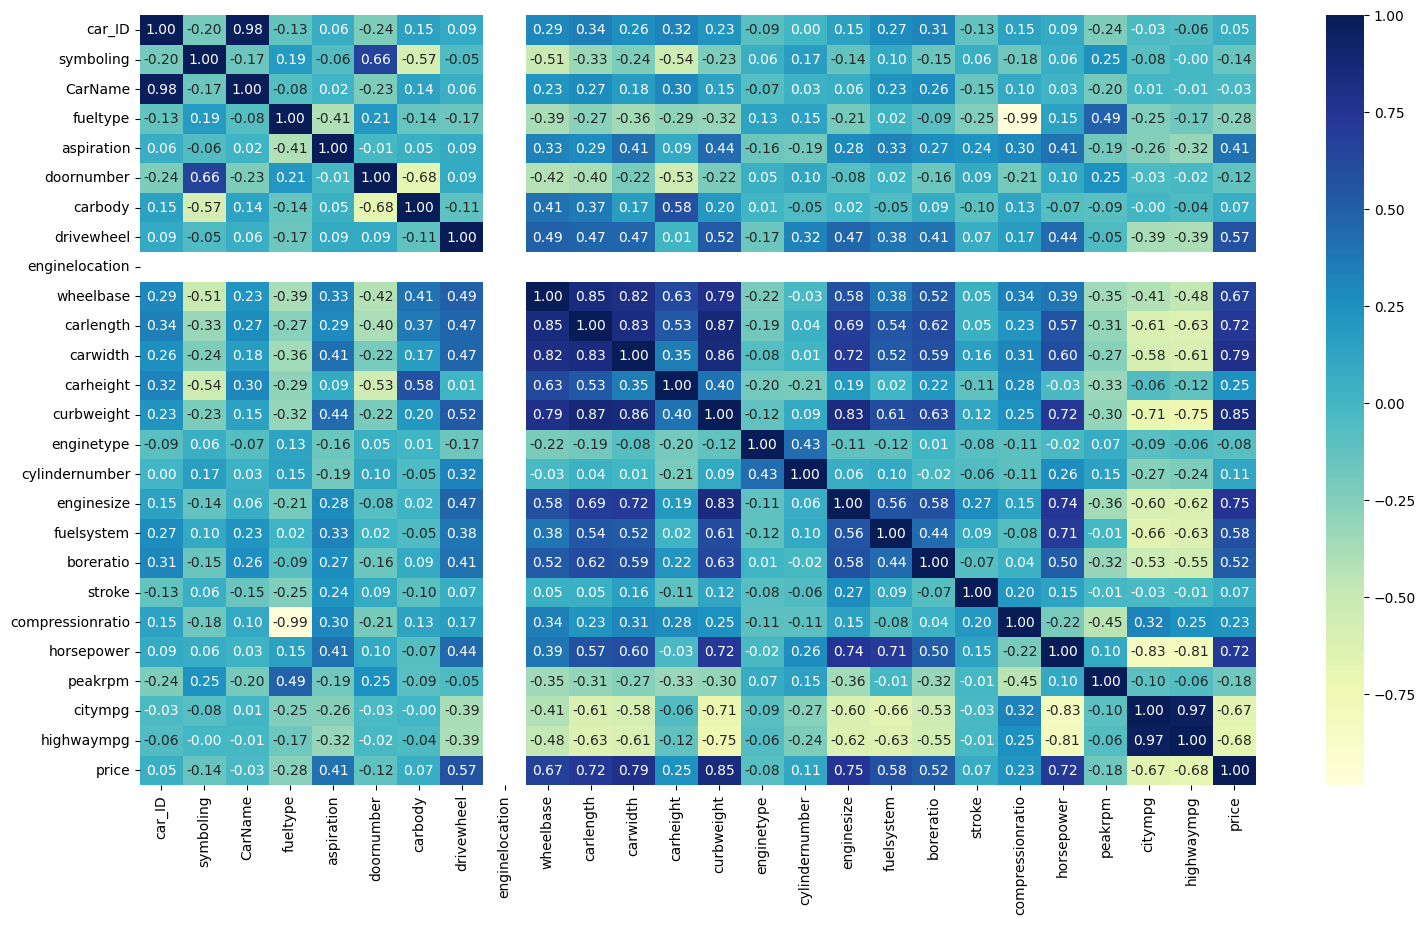

In [90]:
plt.subplots(figsize=(18, 10))
sns.heatmap(df.corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.show()

# AI Model

In [39]:
# droppedCol=['car_ID','symboling','doornumber','enginelocation','wheelbase','carlength','carwidth','carheight','curbweight','fuelsystem','enginesize','stroke','compressionratio','citympg','highwaympg','drivewheel','boreratio']
# data= df.drop(columns=droppedCol)
# data

,CarName,fueltype,aspiration,carbody,enginetype,cylindernumber,horsepower,peakrpm,price
0,alfa-romero giulia,gas,std,convertible,dohc,four,111,5000,13495.0
1,alfa-romero stelvio,gas,std,convertible,dohc,four,111,5000,16500.0
2,alfa-romero Quadrifoglio,gas,std,hatchback,ohcv,six,154,5000,16500.0
3,audi 100 ls,gas,std,sedan,ohc,four,102,5500,13950.0
4,audi 100ls,gas,std,sedan,ohc,five,115,5500,17450.0
...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),gas,std,sedan,ohc,four,114,5400,16845.0
201,volvo 144ea,gas,turbo,sedan,ohc,four,160,5300,19045.0
202,volvo 244dl,gas,std,sedan,ohcv,six,134,5500,21485.0
203,volvo 246,diesel,turbo,sedan,ohc,six,106,4800,22470.0


# Features 

In [187]:
df.iloc[:,1:-1]

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,2,1,0,1,0,2,0,88.6,168.8,...,1,130,5,3.47,2.68,9.0,111,5000,21,27
1,3,3,1,0,1,0,2,0,88.6,168.8,...,1,130,5,3.47,2.68,9.0,111,5000,21,27
2,1,1,1,0,1,2,2,0,94.5,171.2,...,2,152,5,2.68,3.47,9.0,154,5000,19,26
3,2,4,1,0,0,3,1,0,99.8,176.6,...,1,109,5,3.19,3.40,10.0,102,5500,24,30
4,2,5,1,0,0,3,0,0,99.4,176.6,...,0,136,5,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,121,1,0,0,3,2,0,109.1,188.8,...,1,141,5,3.78,3.15,9.5,114,5400,23,28
201,-1,120,1,1,0,3,2,0,109.1,188.8,...,1,141,5,3.78,3.15,8.7,160,5300,19,25
202,-1,122,1,0,0,3,2,0,109.1,188.8,...,2,173,5,3.58,2.87,8.8,134,5500,18,23
203,-1,124,0,1,0,3,2,0,109.1,188.8,...,2,145,3,3.01,3.40,23.0,106,4800,26,27


In [194]:
x = pd.get_dummies(df.drop('price', axis='columns'))

y=data['price']

In [195]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

ValueError: Found input variables with inconsistent numbers of samples: [183, 205]

In [190]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(143, 166)
(62, 166)
(143,)
(62,)


# Train the Model

In [169]:
linReg = LinearRegression()
linReg.fit(x_train,y_train)

LinearRegression()

In [170]:
y_pred = linReg.predict(x_test)
y_pred

array([ 7634.79284064, 10009.91845692, 12734.61936801, 10875.48608465,
       13855.78680799, 18943.43212432, 13287.32518986,  7848.52304509,
        9829.23544839,  9322.11402266, 15723.99912838, 13348.03122474,
        4063.45631836,  6149.22984546, 12737.72487583, 11838.23674277,
       10083.93175113,  9460.69615202,  9322.11402266,  5744.06901071,
       12295.63801042, 13859.00618723,  7088.04951884,  7761.86270724,
       11324.66467504, 17826.29115907,  6996.24181316,  9943.58148165,
        9113.55373395, 13138.78723096,  8100.55739225, 13982.61943331,
       17433.09708937, 17901.43409742, 10929.95438598, 14671.31675633,
        6849.        ,  7634.79284064, 11519.21858598, 10843.42085646,
        7635.1639771 ,  7088.04951884, 26438.72384334, 16657.55177933,
        7634.79284064, 20395.49417756,  7848.52304509, 10152.51297841,
       12821.56063825, 12510.50968924, 10855.37672116,  8838.36171126,
        5954.24378627, 18365.48134658, 20395.49417756, 14668.98800624,
      

# Evaluate the Model

In [171]:
linReg.score(x_train , y_train)

0.9881587916501299

In [172]:
linReg.score(x_test,y_test )

0.5803264849234471

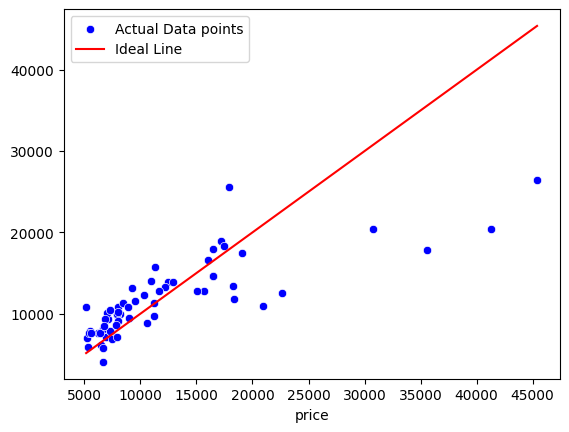

In [173]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()

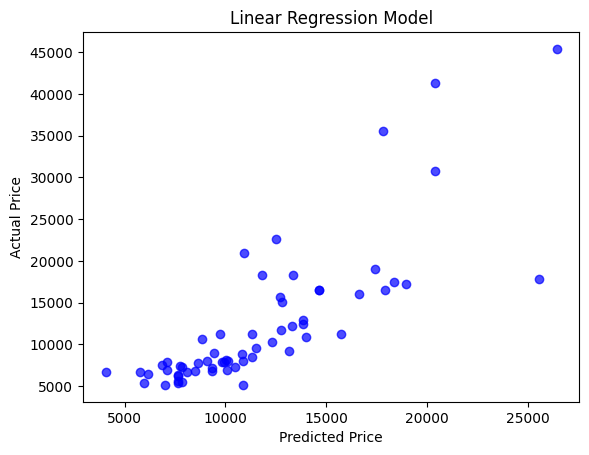

In [185]:
predictions = linReg.predict(x_test)

actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.7,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()